In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df

,Hours,Risk Score
0,10,95
1,9,80
2,2,10
3,15,50
4,10,45
5,16,98
6,11,38
7,16,93


In [3]:
df.describe()

,Hours,Risk Score
count,8.000000,8.000000
mean,11.125000,63.625000
std,4.673252,32.429869
min,2.000000,10.000000
25%,9.750000,43.250000
50%,10.500000,65.000000
75%,15.250000,93.500000
max,16.000000,98.000000


In [4]:
x = np.array(df['Hours'])
y = np.array(df['Risk Score'])

Text(0, 0.5, 'risk score')

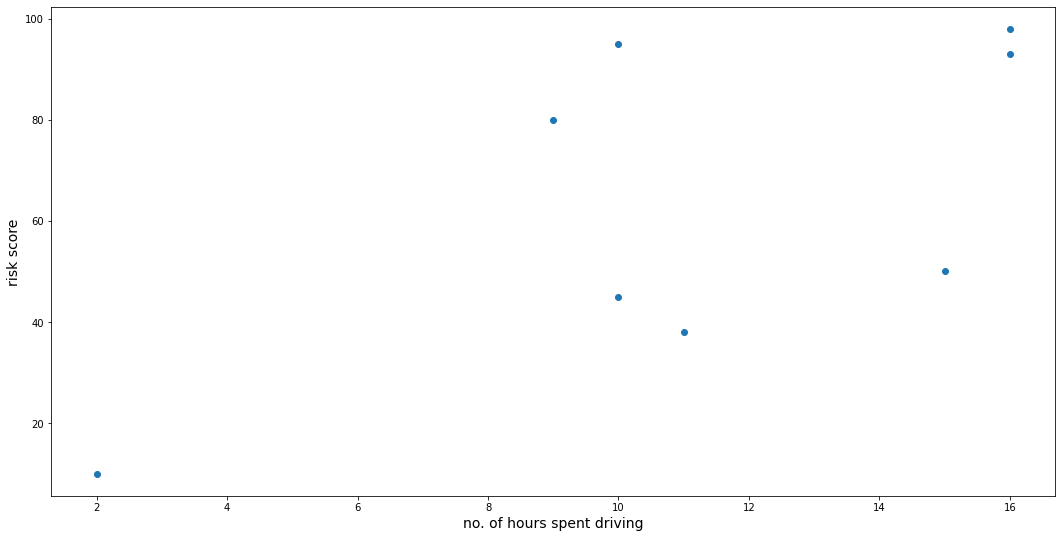

In [5]:
fig = plt.figure(figsize=(18,9))
ax = plt.axes()
ax.scatter(x,y)

ax.set_xlabel('no. of hours spent driving', fontsize=14)
ax.set_ylabel('risk score', fontsize=14)

### Regression Line:

$$y'=b_0+b_1x$$
where,
b1, b0 are the slope and intercept respectively

$$slope = \frac{S_{xy}}{S_{xx}}$$
$$b_1=\frac{\sum(x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^2}$$
and,

$$intercept = \bar{y} – slope.\bar{x}$$
$$b_0 = \bar{y} - b1.\bar{x}$$

cost function:
$$MSE=J=\frac{1}{n}\sum_{i=1}^n(y_i-y')^2$$

In [6]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [7]:
sxy = 0
sxx = 0
syy = 0
for i in range(len(df)):
    sxy += (x[i]-x_mean)*(y[i]-y_mean)
    sxx += (x[i]-x_mean)*(x[i]-x_mean)
    syy += (y[i]-y_mean)*(y[i]-y_mean)

In [8]:
b1 = sxy/sxx
b0 = y_mean - b1*x_mean

def predict(x):
    return b0 + b1*x

In [9]:
print("regression coefficients:")
print('intercept (b0):', b0)
print('slope (b1):', b1)

regression coefficients:
intercept (b0): 12.584627964022893
slope (b1): 4.58789860997547


In [10]:
y_pred = [predict(xi) for xi in x]

### R-Squared value:
$$R^2=\frac{\sum(y_{pred}-\bar{y})^2}{\sum(y-\bar{y})^2}$$

In [11]:
err = 0
for i in range(len(df)):
    err += (y_pred[i]-y_mean)*(y_pred[i]-y_mean)
    
r2_score = err/syy
r2_score

0.4370948145101005

Text(0, 0.5, 'risk score')

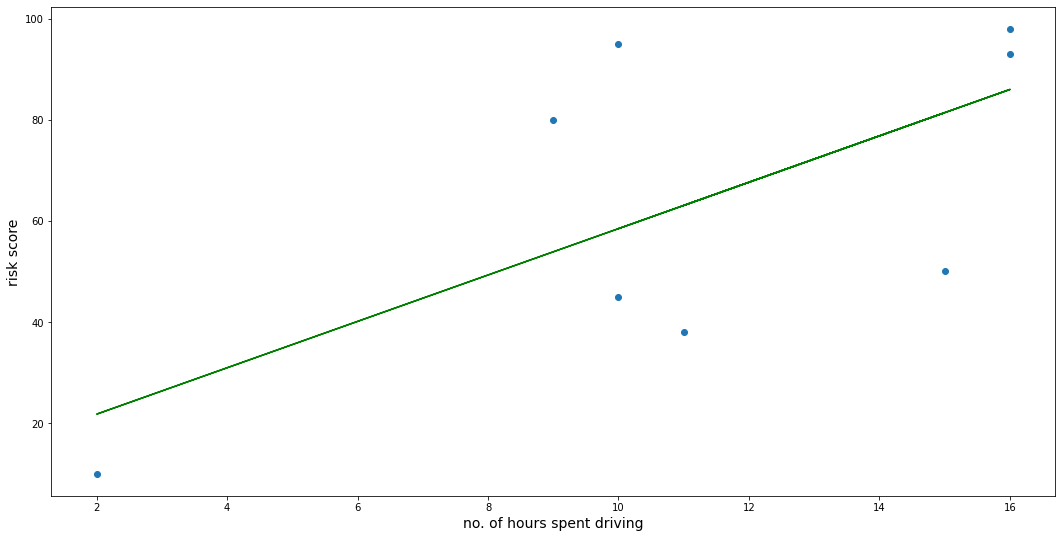

In [12]:
fig = plt.figure(figsize=(18,9))
ax = plt.axes()
ax.scatter(x,y)
ax.plot(x,y_pred, color='green')

ax.set_xlabel('no. of hours spent driving', fontsize=14)
ax.set_ylabel('risk score', fontsize=14)